In [15]:
import pandas as pd
import os
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [16]:
file_plotcdf = []

for f in os.listdir('tune/'):
    if 'unknownips_onehone' in f or 'onehone_plotcdfv2dm_unknown' in f:
        if len(pd.read_csv('tune/' + f))==8 or len(pd.read_csv('tune/' + f))==5:
            file_plotcdf.append(f)

In [17]:
file_plotcdf

['pen_0.5_64unknownips_onehone.csv',
 'glass_0.5_32unknownips_onehone.csv',
 'glass_1_32unknownips_onehone.csv',
 'satimage_onehone_plotcdfv2dm_unknown.csv',
 'glass_0.5_16unknownips_onehone.csv',
 'glass_1_16unknownips_onehone.csv',
 'page_onehone_plotcdfv2dm_unknown.csv',
 'glass_0.5_64unknownips_onehone.csv',
 'glass_1_64unknownips_onehone.csv',
 'pen_0.5_16unknownips_onehone.csv',
 'veh_0.5_32unknownips_onehone.csv',
 'ecoli_1_64unknownips_onehone.csv',
 'opt_1_256unknownips_onehone.csv',
 'satimage_0.5_16unknownips_onehone.csv',
 'letter_onehone_plotcdfv2dm_unknown.csv',
 'opt_1_64unknownips_onehone.csv',
 'ecoli_0.5_64unknownips_onehone.csv',
 'veh_0.5_16unknownips_onehone.csv',
 'letter_1_128unknownips_onehone.csv',
 'ecoli_0.5_16unknownips_onehone.csv',
 'veh_0.5_64unknownips_onehone.csv',
 'ecoli_1_32unknownips_onehone.csv',
 'opt_onehone_plotcdfv2dm_unknown.csv',
 'pen_onehone_plotcdfv2dm_unknown.csv',
 'opt_1_16unknownips_onehone.csv',
 'letter_1_256unknownips_onehone.csv',


In [18]:
len(file_plotcdf)

61

In [19]:
datalist = [
    'veh',
    'glass',
    'ecoli',
    'yeast',
    'opt',
    'pen',
    'letter',
    'page',
    'satimage',
]
dm_file_list = []
for name in datalist:
    name_file = []
    for f in file_plotcdf:
        if name in f:
            name_file.append(f)
    dataframe_list = []
    for f in name_file:
        try:
            float(f.split('_')[1])
            
        except:
            if 'dm' in f:
                dm_file_list.append(f)
            continue
        
        dataframe_list.append(pd.read_csv('tune/' + f))
#     print('tune/' + f)
#     print(dataframe_list[0])
    columns_name = list(dataframe_list[0].columns[1:])
    model_list = list(dataframe_list[0]['model'])
    
    frame = {}
    frame['model'] = model_list
    for col in columns_name:

#         if col.split('_')[-1]==str(0.9) or col.split('_')[-1]==str(0.7):
#             continue
        result_list = []
        ips = dataframe_list[0][col][0]
        result_list.append(ips)
        snips = dataframe_list[0][col][1]
        result_list.append(snips)
        #dm
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][2])
        min_index = np.argmin(dm_list)
        dmrobust = dataframe_list[min_index][col][2]
        result_list.append(dmrobust)
        dmdr = dataframe_list[min_index][col][3]
        result_list.append(dmdr)
        sndmdr = dataframe_list[min_index][col][4]
        result_list.append(sndmdr)

        #robust
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][5])
        min_index = np.argmin(dm_list)
        robust = dataframe_list[min_index][col][5]
        result_list.append(robust)
        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][6])
        min_index = np.argmin(dm_list)
        triple = dataframe_list[min_index][col][6]
        result_list.append(triple)
        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][7])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][7]
        result_list.append(sntriple)
        frame[col] = result_list
    
    frame = pd.DataFrame(frame).round(5)
    frame.to_csv('cdf_result/' + name + 'unknown.csv')
    

        
        
    

In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [21]:
path = 'cdf_result/'

In [22]:
file_list = os.listdir(path)

In [23]:
len(file_list)

46

In [24]:
file_list = []
for f in os.listdir(path):
    if 'unknown' in f and 'xshift' not in f:
        file_list.append(f)

In [25]:
file_list

['glassunknown.csv',
 'penunknown.csv',
 'letterunknown.csv',
 'satimageunknown.csv',
 'yeastunknown.csv',
 'optunknown.csv',
 'ecoliunknown.csv',
 'vehunknown.csv',
 'pageunknown.csv']

In [26]:
dm_file_list

['veh_onehone_plotcdfv2dm_unknown.csv',
 'glass_onehone_plotcdfv2dm_unknown.csv',
 'ecoli_onehone_plotcdfv2dm_unknown.csv',
 'yeast_onehone_plotcdfv2dm_unknown.csv',
 'opt_onehone_plotcdfv2dm_unknown.csv',
 'pen_onehone_plotcdfv2dm_unknown.csv',
 'letter_onehone_plotcdfv2dm_unknown.csv',
 'page_onehone_plotcdfv2dm_unknown.csv',
 'satimage_onehone_plotcdfv2dm_unknown.csv']

['glassunknown.csv', 'penunknown.csv', 'letterunknown.csv', 'satimageunknown.csv', 'yeastunknown.csv', 'optunknown.csv', 'ecoliunknown.csv', 'vehunknown.csv', 'pageunknown.csv']


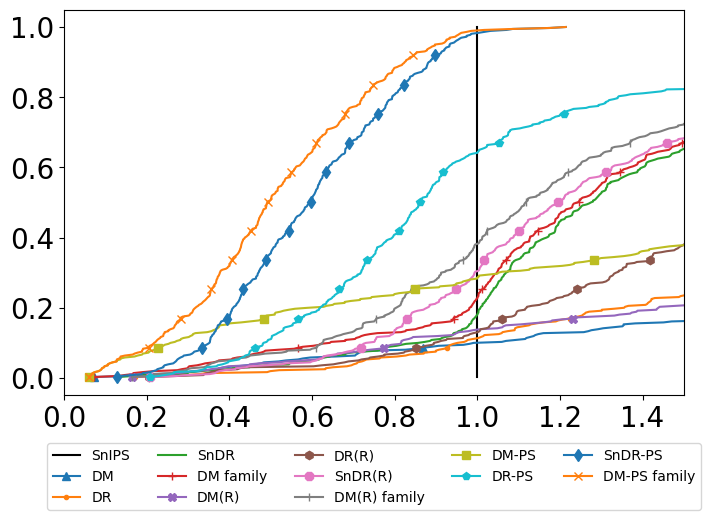

In [14]:
for i in range(1):


    print(file_list)
    
    dm_list = []
    dmdr_list = []
    sndmdr_list = []
    robust_list = []
    triple_list = []
    sntriple_list = []
    snips_list = []
    min_robust_list = []
    min_dmrobust_list = []


    for file in file_list:

        data = pd.read_csv(path + file)

        snips = list(data.iloc[1,:])[2:]
        dm = list(data.iloc[2,:])[2:]
        dmdr = list(data.iloc[3,:])[2:]
        sndmdr = list(data.iloc[4,:])[2:]
        robust = list(data.iloc[5,:])[2:]
        triple = list(data.iloc[6,:])[2:]
        sntriple = list(data.iloc[7,:])[2:]
        



        sntriple_w = np.array(dm)/np.array(snips)
        dm_list += list(sntriple_w)

        sntriple_w = np.array(dmdr)/np.array(snips)
        dmdr_list += list(sntriple_w)
        
        sntriple_w = np.array(sndmdr)/np.array(snips)
        sndmdr_list += list(sntriple_w)

        sntriple_w = np.array(robust)/np.array(snips)
        robust_list += list(sntriple_w)

        sntriple_w = np.array(triple)/np.array(snips)
        triple_list += list(sntriple_w)
        
        sntriple_w = np.array(sntriple)/np.array(snips)
        sntriple_list += list(sntriple_w)

        sntriple_w = np.array(snips)/np.array(snips)
        snips_list += list(sntriple_w)

        triple1 = np.array(triple).reshape(len(triple),1)
        robust1 = np.array(robust).reshape(len(triple),1)
        sntriple1 = np.array(sntriple).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_robust_list += list(sntriple_w)
        
        triple1 = np.array(dm).reshape(len(triple),1)
        robust1 = np.array(dmdr).reshape(len(triple),1)
        sntriple1 = np.array(sndmdr).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_dmrobust_list += list(sntriple_w)




    

    dm_list.sort()
    dmdr_list.sort()
    sndmdr_list.sort()
    robust_list.sort()
    triple_list.sort()
    sntriple_list.sort()
    snips_list.sort()
    min_robust_list.sort()
    min_dmrobust_list.sort()


    y = []
    for i in range(len(sntriple_list)):
        y.append((i+1)/len(sntriple_list))
    dm0_list = []
    dr_list = []
    sndr_list = []
    min_dm_list = []
    for f in dm_file_list:
        data = pd.read_csv('tune/' + f)
        snips = list(data.iloc[1,:])[2:]
        dm = list(data.iloc[2,:])[2:]
        dr = list(data.iloc[3,:])[2:]
        sndr = list(data.iloc[4,:])[2:]


        sntriple_w = np.array(dm)/np.array(snips)
        dm0_list += list(sntriple_w)

        sntriple_w = np.array(dr)/np.array(snips)
        dr_list += list(sntriple_w)

        sntriple_w = np.array(sndr)/np.array(snips)
        sndr_list += list(sntriple_w)

        triple1 = np.array(dm).reshape(len(dm),1)
        robust1 = np.array(dr).reshape(len(dm),1)
        sntriple1 = np.array(sndr).reshape(len(dm),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_dm_list += list(sntriple_w)


    dm0_list.sort()
    dr_list.sort()
    sndr_list.sort()
    min_dm_list.sort()
    y_dm = []
    for i in range(len(dm0_list)):
        y_dm.append((i+1)/len(dm0_list))




    plt.figure(figsize=(8,5))


    plt.plot(snips_list,y,c = 'black')
    

#     plt.plot(dm0_list,y_dm)
#     plt.plot(np.array(dr_list),y_dm)
#     plt.plot(np.array(sndr_list),y_dm)
#     plt.plot(min_dm_list,y_dm)

#     plt.plot(dm_list,y)
#     plt.plot(np.array(dmdr_list),y)
#     plt.plot(np.array(sndmdr_list),y)
#     plt.plot(min_dmrobust_list,y)

#     plt.plot(robust_list,y)
#     plt.plot(triple_list,y)
#     plt.plot(sntriple_list,y)
#     plt.plot(min_robust_list,y)

#     plt.plot(dm0_list,y_dm,marker ='^',markevery=30)
#     plt.plot(np.array(dr_list),y_dm,marker ='^',markevery=30)
#     plt.plot(np.array(sndr_list),y_dm,marker ='^',markevery=30)
#     plt.plot(min_dm_list,y_dm,marker ='^',markevery=30)

#     plt.plot(dm_list,y,marker ='x',markevery=30)
#     plt.plot(np.array(dmdr_list),y,marker ='x',markevery=30)
#     plt.plot(np.array(sndmdr_list),y,marker ='x',markevery=30)
#     plt.plot(min_dmrobust_list,y,marker ='x',markevery=30)

#     plt.plot(robust_list,y,marker ='d',markevery=30)
#     plt.plot(triple_list,y,marker ='d',markevery=30)
#     plt.plot(sntriple_list,y,marker ='d',markevery=30)
#     plt.plot(min_robust_list,y,marker ='d',markevery=30)

    plt.plot(dm0_list,y_dm,marker ='^',markevery=30)
    plt.plot(np.array(dr_list),y_dm,marker ='.',markevery=30)
    plt.plot(np.array(sndr_list),y_dm,marker =',',markevery=30)
    plt.plot(min_dm_list,y_dm,marker ='+',markevery=30)

    plt.plot(dm_list,y,marker ='X',markevery=30)
    plt.plot(np.array(dmdr_list),y,marker ='h',markevery=30)
    plt.plot(np.array(sndmdr_list),y,marker ='8',markevery=30)
    plt.plot(min_dmrobust_list,y,marker ='|',markevery=30)

    plt.plot(robust_list,y,marker ='s',markevery=30)
    plt.plot(triple_list,y,marker ='p',markevery=30)
    plt.plot(sntriple_list,y,marker ='d',markevery=30)
    plt.plot(min_robust_list,y,marker ='x',markevery=30)






    # plt.plot(dmo_list,y_dm)

    # plt.plot(dr_list,y_dm)
    # plt.plot(sndr_list,y_dm)

    plt.xlim((0, 1.5))

    plt.xticks( size = 20)
    plt.yticks( size = 20)




    plt.legend(['SnIPS','DM','DR','SnDR','DM family','DM(R)','DR(R)','SnDR(R)','DM(R) family','DM-PS','DR-PS','SnDR-PS',\
                'DM-PS family'\
                ], bbox_to_anchor=(0.5, -0.3) ,borderaxespad = 0., loc=8,ncol=5)
    plt.savefig('plot_pdf/compare_known_policyshift_unknown.pdf',dpi=600,bbox_inches = 'tight')
#     plt.show()

In [48]:
len(pd.read_csv('cdf_result/glassunknown.csv').columns[2:])

40

In [130]:
dm_list = []
dr_list = []
sndr_list = []
min_dm_list = []
for f in dm_file_list:
    data = pd.read_csv('tune/' + f)
    snips = list(data.iloc[1,:])[2:]
    dm = list(data.iloc[2,:])[2:]
    dr = list(data.iloc[3,:])[2:]
    sndr = list(data.iloc[4,:])[2:]
    
    
    sntriple_w = np.array(dm)/np.array(snips)
    dm_list += list(sntriple_w)
    
    sntriple_w = np.array(dr)/np.array(snips)
    dr_list += list(sntriple_w)
    
    sntriple_w = np.array(sndr)/np.array(snips)
    sndr_list += list(sntriple_w)
    
    triple1 = np.array(dm).reshape(len(dm),1)
    robust1 = np.array(dr).reshape(len(dm),1)
    sntriple1 = np.array(sndr).reshape(len(dm),1)
    c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
    c = np.min(c,axis = 1)
    sntriple_w = c/np.array(snips)
    min_dm_list += list(sntriple_w)

    
dm_list.sort()
dr_list.sort()
sndr_list.sort()
y_dm = []
for i in range(len(dm_list)):
    y_dm.append((i+1)/len(dm_list))



In [108]:
data

Unnamed: 0        model  3104_1330[0.95, 0.1]_1  3104_1330[0.95, 0.1]_0.9  \
0           0    known ips                 0.18205                   0.20501   
1           1  known snips                 0.04238                   0.02284   
2           2     known dm                 0.02816                   0.12444   
3           3   known dmdr                 0.07024                   0.09878   
4           4   known sndr                 0.05210                   0.05878   

   3104_1330[0.95, 0.1]_0.7  3104_1330[0.95, 0.1]_0.5  3104_1330[0.7, 0.1]_1  \
0                   0.14352                   0.06160                0.02119   
1                   0.05901                   0.05608                0.01360   
2                   0.06816                   0.25646                0.14913   
3                   0.08839                   0.06765                0.01204   
4                   0.07924                   0.05640                0.01186   

   3104_1330[0.7, 0.1]_0.9  3104_1330[0.7, 0.1]_0.7  3104_1330[0.7, 0.1]_0.5  \
0                  0.03399                  0.04696                  0.02116   
1                  0.00698                  0.02128                  0.01793   
2                  0.30582                  0.12199                  0.05983   
3                  0.02336                  0.03358                  0.02006   
4                  0.01478                  0.03022                  0.02044   

   ...  3104_1330[1]_0.7  3104_1330[1]_0.5  3104_1330[0.5]_1  \
0  ...      1.856800e-01      1.810100e-01      1.250400e-01   
1  ...      4.335000e-02      9.934000e-02      3.966000e-02   
2  ...      5.710395e+11      5.145530e+11      3.964996e+11   
3  ...      5.710395e+11      5.145530e+11      3.964996e+11   
4  ...      5.710395e+11      5.145530e+11      3.964996e+11   

   3104_1330[0.5]_0.9  3104_1330[0.5]_0.7  3104_1330[0.5]_0.5  \
0        1.182300e-01        9.705000e-02        7.108000e-02   
1        1.358000e-02        2.744000e-02        2.530000e-02   
2        4.699426e+11        8.411117e+11        6.797209e+11   
3        4.699426e+11        8.411117e+11        6.797209e+11   
4        4.699426e+11        8.411117e+11        6.797209e+11   

   3104_1330[0.1]_1  3104_1330[0.1]_0.9  3104_1330[0.1]_0.7  \
0      3.011800e-01        3.840900e-01        2.984500e-01   
1      5.613000e-02        3.785000e-02        8.803000e-02   
2      2.031028e+12        1.762404e+12        1.511075e+12   
3      1.996330e+12        1.762356e+12        1.427995e+12   
4      1.984426e+12        1.762340e+12        1.426581e+12   

   3104_1330[0.1]_0.5  
0        2.121000e-01  
1        1.049900e-01  
2        2.755427e+12  
3        2.570320e+12  
4        2.549052e+12  

[5 rows x 42 columns]

In [27]:
dm_file_list

['veh_onehone_plotcdfv2dm_unknown.csv',
 'glass_onehone_plotcdfv2dm_unknown.csv',
 'ecoli_onehone_plotcdfv2dm_unknown.csv',
 'yeast_onehone_plotcdfv2dm_unknown.csv',
 'opt_onehone_plotcdfv2dm_unknown.csv',
 'pen_onehone_plotcdfv2dm_unknown.csv',
 'letter_onehone_plotcdfv2dm_unknown.csv',
 'page_onehone_plotcdfv2dm_unknown.csv',
 'satimage_onehone_plotcdfv2dm_unknown.csv']